In [41]:
import os
import sys

os.chdir('/Users/wangqiqian/Desktop/TrafficTDApython/')
sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/')
sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/Version3')

from Version3.tdamapper.core import MapperAlgorithm, FailSafeClustering
from Version3.tdamapper.cover import CubicalCover
from Version3.tdamapper.clustering import FailSafeClustering
from Version3.tdamapper.plot import MapperLayoutInteractive, MapperPlot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_circles, load_digits, make_blobs

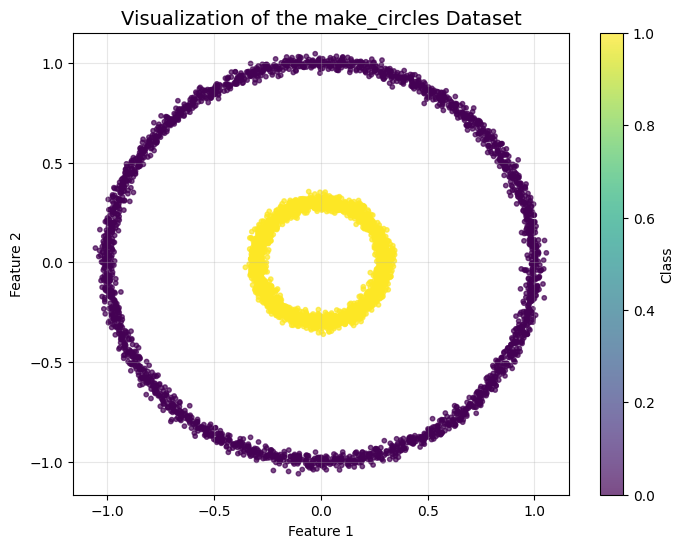

In [51]:
X, y = make_circles( 
    n_samples=5000,
    noise=0.02,
    factor=0.3,
    random_state=42
)
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

pca = PCA(n_components=2)
lens = pca.fit_transform(X)
# data["Label"] = y

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data["Feature 1"], data["Feature 2"], c=y, cmap="viridis", s=10, alpha=0.7)
plt.title("Visualization of the make_circles Dataset", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.grid(alpha=0.3)
plt.show()

In [52]:
detailed_results = []

for overlap in np.arange(3, 6, 1):
    silhouette_for_intervals = []

    for interval in range(3, 11):
        mapper_algo = MapperAlgorithm(
            cover=CubicalCover(
                n_intervals=interval,
                overlap_frac=overlap / 10
            ),
            clustering=AgglomerativeClustering(n_clusters=2, linkage='ward')
        )

        mapper_info = mapper_algo.fit_transform(X, lens)
        silhouette_for_intervals.append(mapper_info[1])

        detailed_results.append({
            "overlap": overlap,
            "interval": interval,
            "silhouette": mapper_info[1],
            "mapper_info": mapper_info
        })
        print(f'interval:{interval}, overlap:{overlap}')
 
    best_interval = np.argmax(silhouette_for_intervals) + 5  # +5 因為 interval 從5開始

detailed_results_df = pd.DataFrame(detailed_results)
detailed_results_df.sort_values(by='silhouette')

Processing Clusters: 100%|██████████| 9/9 [00:00<00:00, 4407.84it/s]


interval:3, overlap:3


Processing Clusters: 100%|██████████| 16/16 [00:00<00:00, 1260.43it/s]


interval:4, overlap:3


Processing Clusters: 100%|██████████| 20/20 [00:00<00:00, 697.93it/s]


interval:5, overlap:3


Processing Clusters: 100%|██████████| 20/20 [00:00<00:00, 676.62it/s]


interval:6, overlap:3


Processing Clusters: 100%|██████████| 31/31 [00:00<00:00, 825.64it/s]


interval:7, overlap:3


Processing Clusters: 100%|██████████| 38/38 [00:00<00:00, 810.22it/s]


interval:8, overlap:3


Processing Clusters: 100%|██████████| 33/33 [00:00<00:00, 741.89it/s]


interval:9, overlap:3


Processing Clusters: 100%|██████████| 45/45 [00:00<00:00, 1370.79it/s]


interval:10, overlap:3


Processing Clusters: 100%|██████████| 9/9 [00:00<00:00, 4221.51it/s]


interval:3, overlap:4


Processing Clusters: 100%|██████████| 16/16 [00:00<00:00, 1172.17it/s]


interval:4, overlap:4


Processing Clusters: 100%|██████████| 19/19 [00:00<00:00, 1339.16it/s]


interval:5, overlap:4


Processing Clusters: 100%|██████████| 20/20 [00:00<00:00, 603.76it/s]


interval:6, overlap:4


Processing Clusters: 100%|██████████| 27/27 [00:00<00:00, 770.13it/s]


interval:7, overlap:4


Processing Clusters: 100%|██████████| 27/27 [00:00<00:00, 860.76it/s]


interval:8, overlap:4


Processing Clusters: 100%|██████████| 32/32 [00:00<00:00, 609.43it/s]


interval:9, overlap:4


Processing Clusters: 100%|██████████| 37/37 [00:00<00:00, 1008.36it/s]


interval:10, overlap:4


Processing Clusters: 100%|██████████| 7/7 [00:00<00:00, 5727.69it/s]


interval:3, overlap:5


Processing Clusters: 100%|██████████| 8/8 [00:00<00:00, 2294.95it/s]


interval:4, overlap:5


Processing Clusters: 100%|██████████| 13/13 [00:00<00:00, 882.43it/s]


interval:5, overlap:5


Processing Clusters: 100%|██████████| 17/17 [00:00<00:00, 1346.71it/s]


interval:6, overlap:5


Processing Clusters: 100%|██████████| 18/18 [00:00<00:00, 1823.52it/s]


interval:7, overlap:5


Processing Clusters: 100%|██████████| 22/22 [00:00<00:00, 609.54it/s]


interval:8, overlap:5


Processing Clusters: 100%|██████████| 20/20 [00:00<00:00, 552.33it/s]


interval:9, overlap:5


Processing Clusters: 100%|██████████| 27/27 [00:00<00:00, 1020.17it/s]

interval:10, overlap:5


,overlap,interval,silhouette,mapper_info
7,3,10,0.545313,"((0, 2, 4, 35, 6, 8, 80, 10, 48, 13, 77, 14, 8..."
16,5,3,0.549377,"((0, 12, 2, 7, 4, 8, 6, 5, 9, 1, 13, 10, 3, 11..."
15,4,10,0.549411,"((1, 15, 2, 33, 56, 3, 5, 31, 7, 8, 47, 10, 12..."
14,4,9,0.555420,"((0, 2, 3, 50, 4, 43, 7, 9, 38, 6, 61, 8, 10, ..."
5,3,8,0.556406,"((1, 13, 2, 63, 71, 3, 5, 7, 8, 67, 6, 31, 68,..."
6,3,9,0.560284,"((0, 2, 42, 5, 49, 7, 8, 45, 11, 60, 12, 14, 1..."
4,3,7,0.563882,"((0, 2, 29, 3, 20, 5, 27, 6, 52, 8, 10, 13, 40..."
9,4,4,0.567355,"((0, 2, 24, 4, 13, 6, 12, 8, 11, 7, 18, 9, 27,..."
12,4,7,0.568475,"((0, 2, 17, 24, 3, 4, 23, 7, 46, 52, 8, 6, 26,..."
22,5,9,0.568747,"((0, 32, 2, 26, 5, 7, 9, 6, 8, 10, 35, 1, 12, ..."


In [50]:
mapper_algo = MapperAlgorithm(
    cover=CubicalCover(
        n_intervals=4,
        overlap_frac=0.5
    ),
    # clustering=AgglomerativeClustering()
    clustering=FailSafeClustering(
        clustering=AgglomerativeClustering(linkage='ward')
        )
)
mapper_info = mapper_algo.fit_transform(X, lens)

mapper_plot = MapperPlot(
    mapper_info[0],
    dim=2,
    iterations=100,
    seed=42
)

fig = mapper_plot.plot_plotly(
    title='',
    width=600,
    height=600,
    colors=y,                       # color according to categorical values
    cmap='jet',                     # Jet colormap, for classes
    agg=np.nanmean,                 # aggregate on nodes according to mean
)

fig.show(config={'scrollZoom': True})

Processing Clusters: 100%|██████████| 8/8 [00:00<00:00, 5955.70it/s]
